# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [6]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

Data from [link](https://www.kaggle.com/c/sberbank-russian-housing-market) [link2](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank)

In [2]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [3]:
data_fs.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [4]:
# fill nan with 0
data_fs = data_fs.fillna(0)
# print(data_fs.head())
# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, sparse=True)

In [5]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14065,46,44.0,7.0,25.0,1.0,2015.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
12978,77,48.0,17.0,17.0,4.0,2009.0,3.0,9.0,3.0,1.631523e+07,...,1,0,0,1,0,0,0,1,0,0
18695,39,18.0,7.0,17.0,1.0,0.0,1.0,9.0,0.0,5.293465e+06,...,0,0,0,0,1,0,0,0,1,0
26411,52,52.0,9.0,17.0,1.0,0.0,2.0,1.0,1.0,2.553630e+07,...,0,0,0,0,1,0,0,0,1,0
1419,30,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.641243e+06,...,0,1,1,0,0,0,1,0,0,0
29787,99,0.0,12.0,0.0,1.0,2015.0,4.0,1.0,1.0,4.441296e+06,...,0,0,0,0,0,1,0,0,0,1
18411,40,0.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
11541,31,17.0,1.0,9.0,2.0,1964.0,1.0,6.0,2.0,4.662813e+06,...,1,0,0,1,0,0,0,1,0,0
20741,55,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,6.677245e+07,...,0,0,0,0,1,0,0,0,1,0
13103,58,42.0,7.0,9.0,1.0,1974.0,3.0,6.0,2.0,4.389199e+06,...,1,0,0,1,0,0,0,1,0,0


Okay, now let's see how much data we have.

In [6]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbca57be320>]],
      dtype=object)

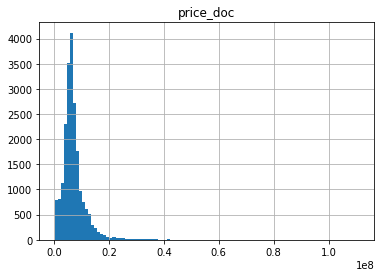

In [7]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbca56705f8>]],
      dtype=object)

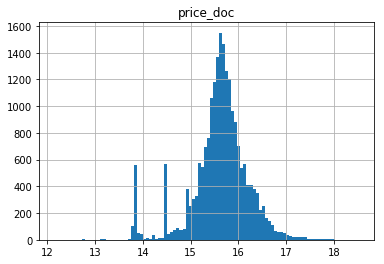

In [8]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

In [12]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import MinMaxScaler
### BEGIN Solution
random_forest = RandomForestRegressor()#max_depth=4,n_estimators=100,random_state=42 
random_forest.fit(X_train, y_train_log.values.ravel())

scaler = MinMaxScaler()

feature_importances_new =  scaler.fit_transform(random_forest.feature_importances_.reshape(-1, 1))
feature_importances_new = pd.DataFrame(feature_importances,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_new[0:20]
### END Solution

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
full_sq,1.000000
sport_count_3000,0.123642
cafe_count_5000_price_2500,0.097205
cafe_count_3000,0.078002
cafe_count_2000,0.074660
micex_cbi_tr,0.042635
brent,0.040432
ttk_km,0.030214
catering_km,0.030003
exhibition_km,0.029718


Print the 20 most important features and their **values**.

Feature ranking:
1. feature full_sq (0.248178)
2. feature sport_count_3000 (0.031397)
3. feature cafe_count_2000 (0.022830)
4. feature cafe_count_5000_price_2500 (0.020283)
5. feature cafe_count_3000 (0.013018)
6. feature micex_cbi_tr (0.009491)
7. feature zd_vokzaly_avto_km (0.008803)
8. feature ttk_km (0.008435)
9. feature brent (0.007382)
10. feature floor (0.007268)
11. feature swim_pool_km (0.007140)
12. feature micex (0.007131)
13. feature kindergarten_km (0.006973)
14. feature ice_rink_km (0.006904)
15. feature catering_km (0.006640)
16. feature cemetery_km (0.006449)
17. feature green_zone_km (0.006420)
18. feature rts (0.006392)
19. feature usdrub (0.006285)
20. feature green_zone_part (0.005985)


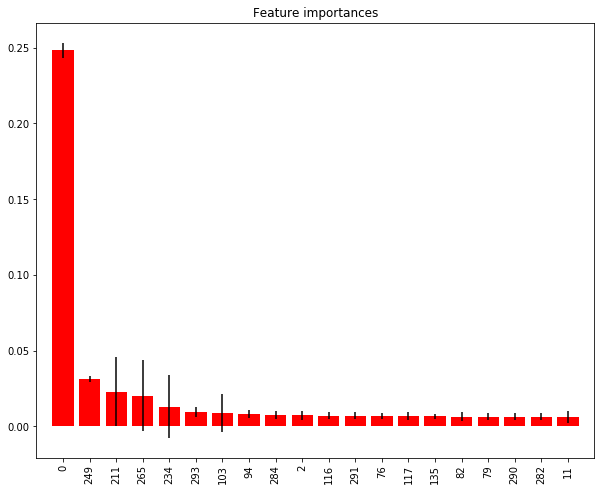

In [13]:
importances = random_forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):#X.shape[1]
    print("%d. feature %s (%f)" % (f + 1, X_train.columns.values[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(20), importances[indices[:20]],
       color="r", yerr=std[indices[:20]], align="center") #X.shape[1]
plt.xticks(range(20), indices,rotation='vertical')#X_train.columns.values[indices[f]]
plt.xlim([-1, 20])#X.shape[1]
plt.show()

In [14]:
feature_import_20 = feature_importances[0:20]
list(feature_import_20.index)

['full_sq',
 'sport_count_3000',
 'cafe_count_5000_price_2500',
 'cafe_count_3000',
 'cafe_count_2000',
 'micex_cbi_tr',
 'brent',
 'ttk_km',
 'catering_km',
 'exhibition_km',
 'kindergarten_km',
 'church_synagogue_km',
 'rts',
 'railroad_km',
 'public_healthcare_km',
 'floor',
 'swim_pool_km',
 'zd_vokzaly_avto_km',
 'micex',
 'usdrub']

<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [16]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [20]:
from sklearn import linear_model
def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Lasso": linear_model.Lasso(), 
        "Ridge": linear_model.Ridge(),
        "Dtree": sklearn.tree.DecisionTreeRegressor(),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators =100)
    }
    
## BEGIN Solution
    error_train = []
    error_test = []
    for key, clf in methods.items():
        clf.fit(X_train,y_train)
#         print(key, (clf.predict(X_train) < 0).any())
        error_train.append(mean_squared_error(y_train, clf.predict(X_train)))
#         print(key, (clf.predict(X_test) < 0).any())
        error_test.append(mean_squared_error(y_test, clf.predict(X_test)))
        
    

### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": error_train,
        "Test loss": error_test
    })

Now apply this function

In [21]:
### BEGIN Solution
X_train_20  = X_train[list(feature_import_20.index)]
X_test_20  = X_test[list(feature_import_20.index)]

comparator(X_train_20, y_train_log.values.ravel(), X_test_20, y_test_log.values.ravel())
### END Solution

,Methods,Train loss,Test loss
0,Linear Regression,2.985605e-01,0.284625
1,Lasso,3.219276e-01,0.310752
2,Ridge,2.985605e-01,0.284625
3,Dtree,3.118071e-07,0.450427
4,RFR,3.147246e-02,0.225057


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [61]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    rmsle = make_scorer(mean_squared_log_error, greater_is_better=False)
    for j in X.columns:
        if j not in used_features:
            used_features.append(j)
#             print("X[:, feat_list]",X[:,used_features])
            scores[j] = np.sqrt(-cross_val_score(model,
                                        X[used_features],
                                        y, 
                                        cv=cv,n_jobs=-1,scoring=rmsle).mean())
            used_features.pop() 
#             print(scores[j])
    ### END Solution

    return scores

In [74]:
scores = selection_step(sklearn.tree.DecisionTreeRegressor(),
               X_train,
               y_train,
               used_features=[])
scores

{'full_sq': 0.5397422488043692,
 'life_sq': 0.5854590255701284,
 'floor': 0.622265145406292,
 'max_floor': 0.6155553517404415,
 'material': 0.6206361346339767,
 'build_year': 0.6094508421159918,
 'num_room': 0.5748488580084485,
 'kitch_sq': 0.6091820898514883,
 'state': 0.6189004684705413,
 'area_m': 0.5788548701680302,
 'raion_popul': 0.5788473338329203,
 'green_zone_part': 0.5788702392748735,
 'indust_part': 0.58421567932348,
 'children_preschool': 0.5788473725963549,
 'preschool_quota': 0.5879774560912125,
 'preschool_education_centers_raion': 0.61462549074888,
 'children_school': 0.5788473725963549,
 'school_quota': 0.5859847073139114,
 'school_education_centers_raion': 0.6102056838650693,
 'school_education_centers_top_20_raion': 0.626429769671461,
 'hospital_beds_raion': 0.601759326066307,
 'healthcare_centers_raion': 0.6174617430947238,
 'university_top_20_raion': 0.6197274571189565,
 'sport_objects_raion': 0.6048534013192142,
 'additional_education_raion': 0.6187650519522091,
 

In [90]:
def forward_steps(X, y, n_rounds, method,cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    # Initialize with an empty list of features.
    feat_best_list = []

    ### BEGIN Solution
    scores = {}
    round = 0
    min_score = np.inf
    
    while round < n_rounds:
        round = round + 1
        if X.shape[1] <= len(feat_best_list):
            break
        
        
        scores = selection_step(method,X,y,used_features=feat_best_list,cv=cv)
        # **Add** the feature that gives the highest "quality" of the model.
        scores = sorted(scores.items(), key=lambda kv: kv[1])
        feat_best_list.append(scores[0][0])
        print(scores[0])
        
        
        if scores[0][1]<min_score:
            min_score = scores[0][1] 
            round = 0
    
    ### END Solution
    
    return feat_best_list


Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [86]:
### BEGIN Solution
n_rounds = 2
feat_best_list_DTReg = forward_steps(X_train, y_train, n_rounds, sklearn.tree.DecisionTreeRegressor())
print(feat_best_list_DTReg)
### END Solution

('full_sq', 0.5397422488043692)
('ecology_no data', 0.5147800561362957)
('sub_area_Nekrasovka', 0.5105545387860786)
('sub_area_Poselenie Vnukovskoe', 0.5092471146457697)
('sub_area_Zapadnoe Degunino', 0.5083460727120713)
('cafe_count_1500_price_high', 0.5074172163097785)
('sub_area_Hamovniki', 0.506871994877268)
('sub_area_Mozhajskoe', 0.5062422412368338)
('sub_area_Poselenie Novofedorovskoe', 0.5056926717960329)
('sub_area_Basmannoe', 0.5047047556662292)
('sub_area_Poselenie Filimonkovskoe', 0.5044561751343233)
('sub_area_Poselenie Krasnopahorskoe', 0.5040115879036127)
('sub_area_Nagatinskij Zaton', 0.5036124007063014)
("sub_area_Sokol'niki", 0.5031678766509725)
('sub_area_Ostankinskoe', 0.5034110446203557)
("sub_area_Krasnosel'skoe", 0.5031589036018187)
('sub_area_Tverskoe', 0.5031140171529951)
('sub_area_Troickij okrug', 0.5031823479883162)
('sub_area_Poselenie Kievskij', 0.502970251314139)
('sub_area_Metrogorodok', 0.5028991929884116)
('sub_area_Poselenie Moskovskij', 0.50295415696

Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [87]:
feat_best_list_DTReg

['full_sq',
 'ecology_no data',
 'sub_area_Nekrasovka',
 'sub_area_Poselenie Vnukovskoe',
 'sub_area_Zapadnoe Degunino',
 'cafe_count_1500_price_high',
 'sub_area_Hamovniki',
 'sub_area_Mozhajskoe',
 'sub_area_Poselenie Novofedorovskoe',
 'sub_area_Basmannoe',
 'sub_area_Poselenie Filimonkovskoe',
 'sub_area_Poselenie Krasnopahorskoe',
 'sub_area_Nagatinskij Zaton',
 "sub_area_Sokol'niki",
 'sub_area_Ostankinskoe',
 "sub_area_Krasnosel'skoe",
 'sub_area_Tverskoe',
 'sub_area_Troickij okrug',
 'sub_area_Poselenie Kievskij',
 'sub_area_Metrogorodok',
 'sub_area_Poselenie Moskovskij',
 'sub_area_Poselenie Voskresenskoe',
 'sub_area_Novo-Peredelkino',
 'sub_area_Poselenie Rjazanovskoe']

In [94]:
### BEGIN Solution

def forward_comparator(X_train, y_train, X_test, y_test,n_rounds):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(n_jobs=-1),  
        "Ridge": linear_model.Ridge(n_jobs=-1),
        "Dtree": sklearn.tree.DecisionTreeRegressor(n_jobs=-1),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators =100,n_jobs=-1)
    }
    
## BEGIN Solution
    error_train = []
    error_test = []
    best_features = []
    for key, clf in methods.items():
        best_features = forward_steps(X_train, y_train, n_rounds, clf)
        clf.fit(X_train[best_features],y_train)
#         print(key, (clf.predict(X_train) < 0).any())
        error_train.append(np.sqrt(mean_squared_error(y_train, clf.predict(X_train[best_features]))))
#         print(key, (clf.predict(X_test) < 0).any())
        error_test.append(np.sqrt(mean_squared_error(y_test, clf.predict(X_test[best_features]))))
        
    
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train on feat_best_list": error_train,
        "Test on feat_best_list": error_test
    })

forward_comparator(X_train[list(feature_import_20.index)], y_train_log.values.ravel(),
                   X_test[list(feature_import_20.index)], y_test_log.values.ravel(),n_rounds)
### END Solution

('zd_vokzaly_avto_km', 0.03595537175230116)
('full_sq', 0.03513159108259014)
('micex_cbi_tr', 0.03474222575534427)
('floor', 0.034528660839013264)
('rts', 0.03447409350650002)
('catering_km', 0.034421984103519)
('sport_count_3000', 0.0344042383467799)
('cafe_count_2000', 0.03424855019721042)
('cafe_count_5000_price_2500', 0.03418077876316936)
('swim_pool_km', 0.03414879931984322)
('railroad_km', 0.034121559706850255)
('ttk_km', 0.034116609636908275)
('kindergarten_km', 0.03411318917330088)
('public_healthcare_km', 0.034107794085840415)
('church_synagogue_km', 0.03410584087882903)
('exhibition_km', 0.03410537677601008)
('brent', 0.03410784166242625)
('micex', 0.03410381763945522)
('usdrub', 0.03410690686697694)
('cafe_count_3000', 0.034111800219151174)
('zd_vokzaly_avto_km', 0.035955371710283145)
('full_sq', 0.035131590883931335)
('micex_cbi_tr', 0.034742225544780465)
('floor', 0.03452866061079538)
('rts', 0.03447409327944025)
('catering_km', 0.03442198242172818)
('sport_count_3000', 0.

,Methods,Train on feat_best_list,Test on feat_best_list
0,Linear Regression,0.546407,0.533503
1,Ridge,0.546407,0.533503
2,Dtree,0.233135,0.667522
3,RFR,0.176859,0.473311


<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [114]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import golden,minimize_scalar, minimize
from copy import deepcopy

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

In [369]:
### BEGIN Solution
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

def log_loss(y, z):
    return np.sum(np.log(1 + np.exp(-y * z)))
def log_loss_deriv(y, z):
    return  - y  / (1 + np.exp(y * z))
### END Solution

In [370]:
class MyGradBoosting():
    def __init__(self,N_estimators,regressor):
        self.N_estimators = N_estimators
        self.regressor = regressor
        
    def predict(self, point): 
        
        z = golden(lambda z: log_loss(y, z))
        pred = np.repeat(z, point.shape[0])
        for i in range(len(self.model)):
            g = self.weight[i]
            b_n = self.model[i]
            if i > 0:
                pred = pred + g * b_n.predict(point)
        return np.sign(pred)

    def fit(self,X,y):
        self.model = []
        self.weight = []
        
        for n in range(self.N_estimators):
            preds = self.predict(X)
            res = -log_loss_deriv(y, preds)
            self.regressor.fit(X, res)
            weights = lambda g: log_loss(y, preds + g * self.regressor.predict(X)) 
            g = golden(weights)
            self.model.append(deepcopy(self.regressor))
            self.weight.append(g)
        return self.model, self.weight



In [371]:
n_estimators = 50
grad_boost = MyGradBoosting(N_estimators=n_estimators,
                           regressor=DecisionTreeRegressor())
models, weights = grad_boost.fit(X_train, y_train)

In [402]:
xx, yy = np.meshgrid(np.linspace(-1.25, 2.25,100), 
                  np.linspace(-0.75, 1.25, 100))
zz = np.c_[xx.ravel(), yy.ravel()]

In [403]:
pred = grad_boost.predict(point=zz).reshape((100,100))

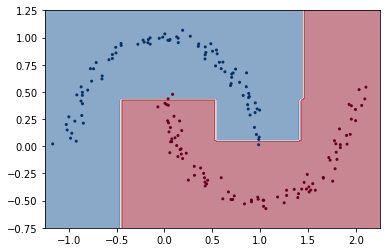

In [404]:
plt.contourf(xx, yy, pred,cmap=plt.cm.RdBu_r,alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=4,cmap=plt.cm.RdBu_r)

plt.show()

In [405]:
y_pred = grad_boost.predict(point=X_test)

In [406]:
from sklearn.metrics import accuracy_score, log_loss, f1_score

In [407]:
print('accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test,  y_pred))
print('f1 score:', f1_score(y_test, y_pred))

accuracy score: 0.9583333333333334
log loss: 1.4391356730570342
f1 score: 0.9572649572649573


<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [48]:
import xgboost as xgb
from sklearn.metrics import auc, roc_curve
from time import time
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

1 task

In [3]:
### BEGIN Solution
def default_parameters(model, X_train, y_train,X_test, y_test):
    time_begin = time()
    model.fit(X_train, y_train)
    time_end = time()

    time_model = time_end - time_begin

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, time_model

fpr_xgb, tpr_xgb, roc_auc_xgb, time_xgb = \
default_parameters(xgb.XGBClassifier(), X_train, y_train,X_test, y_test)

fpr_lgb, tpr_lgb, roc_auc_lgb, time_lgb = \
default_parameters(lgb.LGBMClassifier(), X_train, y_train,X_test, y_test)

fpr_cat, tpr_cat, roc_auc_cat, time_cat = \
default_parameters(cat.CatBoostClassifier(verbose = False), X_train, y_train,X_test, y_test)
    

### END Solution

In [4]:
print('fit time xgb: ', time_xgb)
print('fit time lgb: ', time_lgb)
print('fit time cat: ', time_cat)

fit time xgb:  0.13376450538635254
fit time lgb:  0.13897371292114258
fit time cat:  23.641408681869507


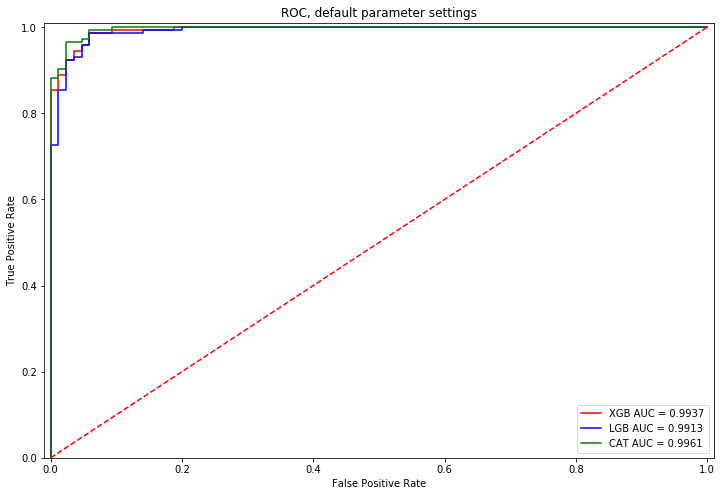

In [7]:
plt.figure(figsize=(12, 8))
plt.title('ROC, default parameter settings' )
plt.plot(fpr_xgb, tpr_xgb,  color="red", alpha=1,label='XGB AUC = {0:.4f}'.format(roc_auc_xgb))
plt.plot(fpr_lgb, tpr_lgb,  color="blue", alpha=1, label = 'LGB AUC = {0:.4f}'.format(roc_auc_lgb))
plt.plot(fpr_cat, tpr_cat,  color="green", alpha=1, label = 'CAT AUC = {0:.4f}'.format(roc_auc_cat))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim(-0.01, 1.01)
plt.ylim(-0.0, 1.01)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'best')
plt.show()

2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

 - Use grid search with the  3 -fold cross valiadation to choose the best model

In [17]:
param_grid = {'learning_rate': [1e-3,1e-2,0.1,0.3,0.5,0.7,0.8,1,1.2,1.5],
              'max_depth':[int(x) for x in np.linspace(3, 12, num = 9)],
              'n_estimators':[5,10,25,50,75, 100, 150, 200]
             }
param_grid

{'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.8, 1, 1.2, 1.5],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12],
 'n_estimators': [50, 100, 150, 200]}

In [22]:
param_grid = {'learning_rate': [1e-3,1e-2,0.1,0.3,0.5,0.7,0.8,1,1.2,1.5],
              'max_depth':[int(x) for x in np.linspace(3, 12, num = 9)],
              'n_estimators':[10,50,75, 100, 150, 200]
             }
   
xgb_model = xgb.XGBClassifier()
xgb_GS_CV = GridSearchCV(xgb_model,param_grid,cv=3)
xgb_GS_CV.fit(X_train, y_train)
best_xgb=xgb_GS_CV.best_params_

print(best_xgb)
print(xgb_GS_CV.best_score_)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 75}
0.9736070381231672


In [23]:
lgb_model = lgb.LGBMClassifier()
lgb_GS_CV = GridSearchCV(lgb_model,param_grid,cv=3)
lgb_GS_CV.fit(X_train, y_train)
best_lgb=lgb_GS_CV.best_params_

print(best_lgb)
print(lgb_GS_CV.best_score_)

{'learning_rate': 1.2, 'max_depth': 3, 'n_estimators': 10}
0.9736070381231672


In [24]:
param_grid_cat = {'learning_rate': [1e-2, 0.1,0.2,0.3,0.5],
                  'depth': [int(x) for x in np.linspace(3, 8, num = 5)],
                  'iterations' : [50, 75,100]}
cat_model = cat.CatBoostClassifier(verbose = False)
cat_GS_CV = GridSearchCV(cat_model,param_grid_cat,cv=3)
cat_GS_CV.fit(X_train, y_train)
best_cat=cat_GS_CV.best_params_

print(best_cat)
print(cat_GS_CV.best_score_)

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'depth': 5, 'iterations': 50, 'learning_rate': 0.2}
0.9736070381231672


<br>

In [25]:
fpr_xgb, tpr_xgb, roc_auc_xgb, time_xgb = \
default_parameters(xgb.XGBClassifier(learning_rate=best_xgb['learning_rate'],
                             n_estimators=best_xgb['n_estimators'],
                             max_depth=best_xgb['max_depth'],
                             n_jobs=-1),
                   X_train, y_train,X_test, y_test)

fpr_lgb, tpr_lgb, roc_auc_lgb, time_lgb = \
default_parameters(lgb.LGBMClassifier(learning_rate=best_lgb['learning_rate'],
                             n_estimators=best_lgb['n_estimators'],
                             max_depth=best_lgb['max_depth'],
                             n_jobs=-1),
                   X_train, y_train,X_test, y_test)


In [26]:
fpr_cat, tpr_cat, roc_auc_cat, time_cat = \
default_parameters(cat.CatBoostClassifier(learning_rate= best_cat['learning_rate'],
                             iterations=best_cat['iterations'],
                             depth = best_cat['depth'],
                             verbose = False), X_train, y_train,X_test, y_test)

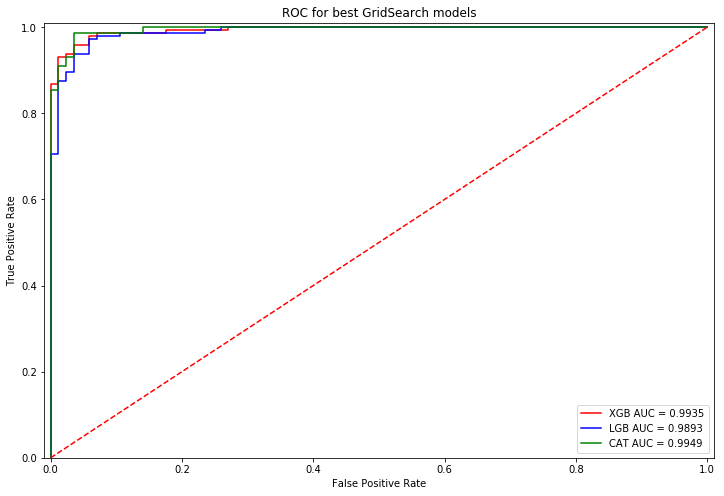

In [27]:
plt.figure(figsize=(12, 8))
plt.title('ROC for best GridSearch models' )
plt.plot(fpr_xgb, tpr_xgb,  color="red", alpha=1,label='XGB AUC = {0:.4f}'.format(roc_auc_xgb))
plt.plot(fpr_lgb, tpr_lgb,  color="blue", alpha=1, label = 'LGB AUC = {0:.4f}'.format(roc_auc_lgb))
plt.plot(fpr_cat, tpr_cat,  color="green", alpha=1, label = 'CAT AUC = {0:.4f}'.format(roc_auc_cat))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim(-0.01, 1.01)
plt.ylim(-0.0, 1.01)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'best')
plt.show()

#### the training time as a function of (separately) **tree depth**

In [51]:
def timing(model, X_train, y_train):
    time_begin = time()
    model.fit(X_train, y_train)
    time_end = time()

    time_model = time_end - time_begin
    return time_model

In [50]:
[int(x) for x in np.linspace(10, 100, num = 5)]

[10, 32, 55, 77, 100]

In [49]:
xgb_depth_time = []
lgb_depth_time = []
cat_depth_time = []
for depth in range(1,10):
    time_xgb = timing(xgb.XGBClassifier(max_depth=depth), X_train, y_train)
    xgb_depth_time.append(time_xgb)
    
    time_lgb = timing(lgb.LGBMClassifier(max_depth=depth), X_train, y_train)
    lgb_depth_time.append(time_lgb)
    
    time_cat = timing(cat.CatBoostClassifier(verbose=False, depth = depth), X_train, y_train)
    cat_depth_time.append(time_cat)

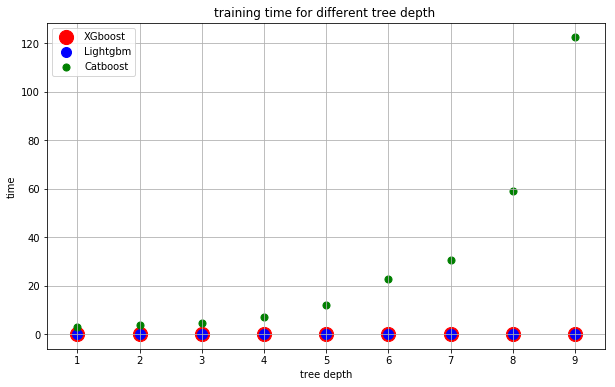

In [65]:
plt.figure(figsize=(10, 6))
plt.title('training time for different tree depth ' )
plt.scatter(range(1,10), xgb_depth_time,  color="red", alpha=1,label='XGboost',  s= 200)
plt.scatter(range(1,10), lgb_depth_time,  color="blue", alpha=1, label = 'Lightgbm',s= 100)
plt.scatter(range(1,10), cat_depth_time,  color="green", alpha=1, label = 'Catboost',s=50)
plt.xlabel('tree depth')
plt.ylabel('time')
plt.legend()
plt.grid()

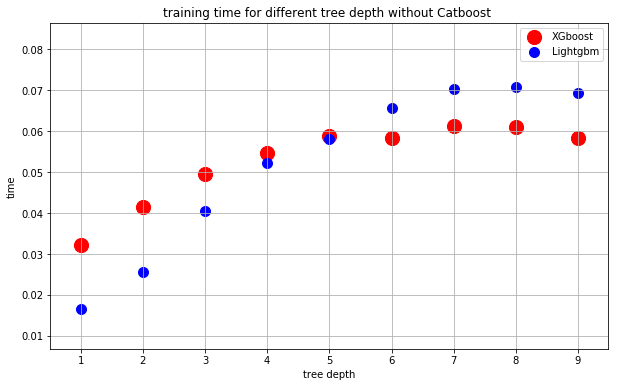

In [66]:
plt.figure(figsize=(10, 6))
plt.title('training time for different tree depth without Catboost ' )
plt.scatter(range(1,10), xgb_depth_time,  color="red", alpha=1,label='XGboost',  s = 200)
plt.scatter(range(1,10), lgb_depth_time,  color="blue", alpha=1, label = 'Lightgbm',s = 100)
plt.xlabel('tree depth')
plt.ylabel('time')
plt.legend()
plt.grid()

#### the training time as a function of  **the number of estimators in the ensemble**

In [71]:
xgb_est_time = []
lgb_est_time = []
cat_est_time = []
for estimator in [int(x) for x in np.linspace(10, 250, num = 8)]:    
    time_xgb = timing(xgb.XGBClassifier(n_estimators=estimator), X_train, y_train)
    xgb_est_time.append(time_xgb)
    
    time_lgb = timing(lgb.LGBMClassifier(n_estimators=estimator), X_train, y_train)
    lgb_est_time.append(time_lgb)
    
    time_cat = timing(cat.CatBoostClassifier(verbose = False, n_estimators=estimator), X_train, y_train)
    cat_est_time.append(time_cat)

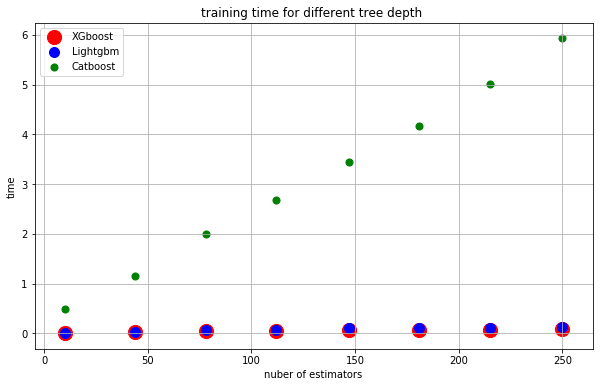

In [75]:
ox = [int(x) for x in np.linspace(10, 250, num = 8)]
plt.figure(figsize=(10, 6))
plt.title('training time for different tree depth ' )
plt.scatter(ox, xgb_est_time,  color="red", alpha=1,label='XGboost',  s= 200)
plt.scatter(ox, lgb_est_time,  color="blue", alpha=1, label = 'Lightgbm',s= 100)
plt.scatter(ox, cat_est_time,  color="green", alpha=1, label = 'Catboost',s=50)
plt.xlabel('nuber of estimators')
plt.ylabel('time')
plt.legend()
plt.grid()

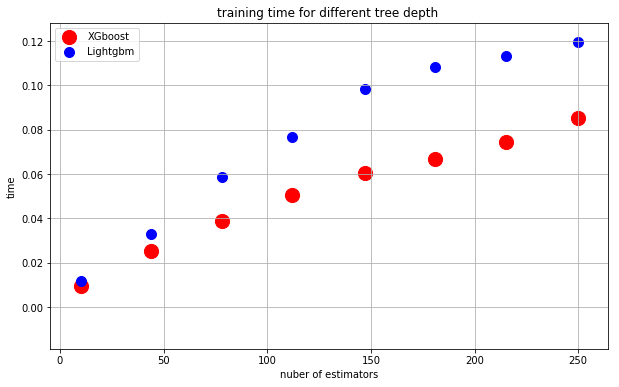

In [76]:
plt.figure(figsize=(10, 6))
plt.title('training time for different tree depth ' )
plt.scatter(ox, xgb_est_time,  color="red", alpha=1,label='XGboost',  s= 200)
plt.scatter(ox, lgb_est_time,  color="blue", alpha=1, label = 'Lightgbm',s= 100)
plt.xlabel('nuber of estimators')
plt.ylabel('time')
plt.legend()
plt.grid()

As we can see best models from GridSearch have better quality. 

And despite Catboost has better quality then other, it works slower. 

## NNs

### Task 6 (1 pt.): Activation functions
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

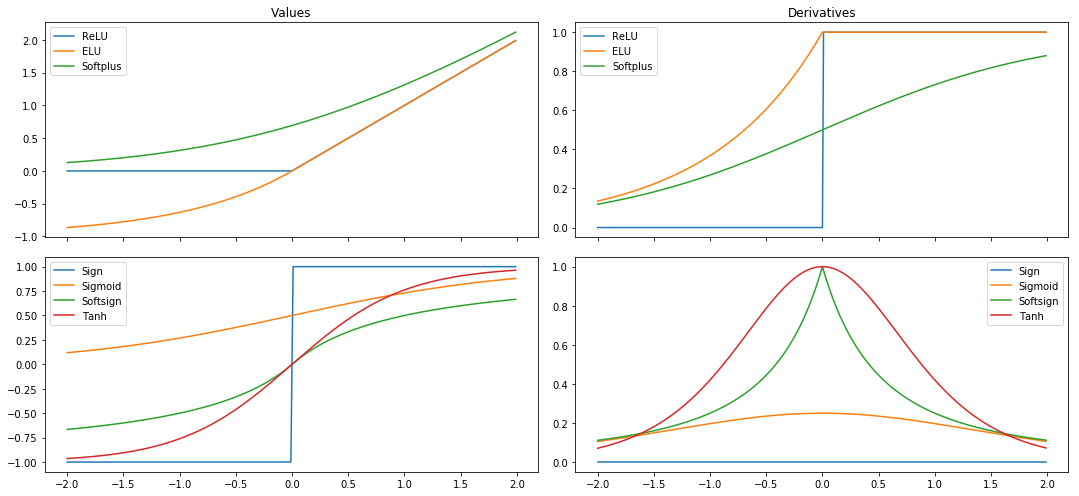

In [94]:
x = torch.arange(-2, 2, .01, requires_grad=True)
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
        y = activation(x)
        axes[i, 0].plot(x.detach().numpy(), y.detach().numpy(), label=function_name)
        x.grad.data.zero_()
        y.sum().backward()
        axes[i, 1].plot(x.detach().numpy(), x.grad.detach().numpy(), label=function_name)

        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

Sigmoid, Softsign & Tanh activation functions face with the Vanishing Gradient Problem. 

It means that the gradient vanishes( we have on both edge sides 0), and the backward will not update weights and will responsible for the loss to remain constant - the network stops learning.

Sign will not help as to understand something in the Vanishing Gradient Problem.

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [691]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

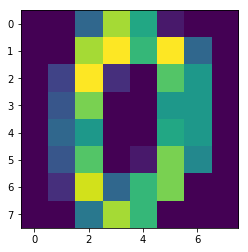

In [692]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

x = digits[0]
plt.imshow(x.reshape(8, 8))
y = 0

Implement the MLP with backprop.

In [693]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty_like(self.thetas)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty_like(self.bias)
        self.input = 0 #https://skoltech.instructure.com/courses/1839/discussion_topics/6468


    def forward(self, x):
        self.input = x
        output = np.matmul(x, self.thetas) + self.bias
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = np.matmul(self.thetas,output_grad)
        self.thetas_grads += np.matmul(self.input.reshape(-1,1) ,output_grad.reshape(-1,1).T)
        self.bias_grads += output_grad.sum(axis=0)
        
        ### END Solution
        return input_grad


class LogisticActivation:
    def __init__(self):
        self.input = 0
        
    def forward(self, x):
        self.input = x
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        output = self.forward(self.input)
        input_grad = output_grad*output*(1-output)
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def __init__(self):
        self.input = 0
        
    def forward(self, x):
        self.input = x
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        output = self.forward(self.input)
        input_grad = output_grad*output*(1-output)
        ### END Solution
        return input_grad
    

class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        self.softmax = SoftMaxActivation()
        
    
    def forward(self, x):
        return self.softmax.forward(self.linear2.forward(self.activation1.forward(self.linear1.forward(x))))


    def backward(self, x, output_grad):
        ### BEGIN Solution
        lin_input_grad = self.linear2.backward(x, output_grad)
        log_input_grad = self.activation1.backward(x, lin_input_grad)
        output_grad = self.linear1.backward(x, log_input_grad)
        ### END Solution

In [695]:
def crossentropy(pred, target): 
    if pred.ndim == 1 :
        cross = -np.log2(pred)[target]    
    else:
        t = np.zeros_like(pred)
        t[np.arange(len(target)), target] = 1
        cross = -np.sum(t * np.log2(pred), axis=1)
    return cross

def grad_crossentropy(pred, target):
    t = np.zeros_like(pred)
    t[target] = 1 
    return (-t+pred)
# https://aayushmnit.github.io/posts/2018/06/Building_neural_network_from_scratch/
# https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py
### END Solution

Starting epoch 0 Starting epoch 10 Starting epoch 20 Starting epoch 30 Starting epoch 40 Starting epoch 50 Starting epoch 60 Starting epoch 70 Starting epoch 80 Starting epoch 90 Starting epoch 100 Starting epoch 110 Starting epoch 120 Starting epoch 130 Starting epoch 140 Starting epoch 150 Starting epoch 160 Starting epoch 170 Starting epoch 180 Starting epoch 190 

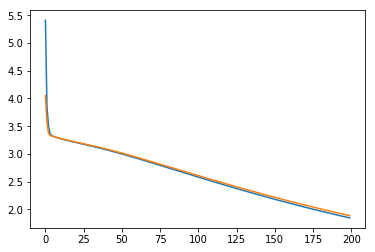

In [696]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]
        
        ### BEGIN Solution
        # ... zero the gradients
        mlp.linear1.thetas_grads = np.zeros_like(mlp.linear1.thetas_grads)
        mlp.linear1.bias_grads = np.zeros_like(mlp.linear1.bias_grads)

        mlp.linear2.thetas_grads = np.zeros_like(mlp.linear2.thetas_grads)
        mlp.linear2.bias_grads = np.zeros_like(mlp.linear2.bias_grads)
        
        # prediction = mlp.forward(x)
        prediction = mlp.forward(x)
        # loss = # use cross entropy loss
        loss = crossentropy(prediction, target)
        loss_grad = grad_crossentropy(prediction, target)
        learning_curve[epoch] += loss
        grad = mlp.backward(x, loss_grad)
        # ... perform backward pass
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.thetas -= learning_rate * mlp.linear1.thetas_grads
        mlp.linear1.bias -= learning_rate * mlp.linear1.bias_grads
        mlp.linear2.thetas -= learning_rate * mlp.linear2.thetas_grads
        mlp.linear2.bias -= learning_rate * mlp.linear2.bias_grads
    
    learning_curve[epoch] /= train_size
    prediction = mlp.forward(x_test)
    loss = crossentropy(prediction, y_test).mean()
    test_curve[epoch] = loss

plt.plot(learning_curve)
plt.plot(test_curve)

In [697]:
predictions = np.argmax(mlp.forward(digits), axis=1)
pd.DataFrame(confusion_matrix(targets, predictions))

,0,1,2,3,4,5,6,7,8,9
0,173,0,0,0,2,1,1,0,0,1
1,0,123,8,5,7,1,5,16,4,13
2,0,2,168,1,0,0,0,3,0,3
3,2,1,3,151,0,7,0,8,0,11
4,1,0,2,0,176,0,0,2,0,0
5,0,0,2,0,3,158,1,0,0,18
6,1,1,0,0,5,0,174,0,0,0
7,0,0,1,0,1,2,0,172,3,0
8,1,41,22,20,4,8,7,10,55,6
9,1,2,0,5,6,3,0,11,0,152
